# Task 1 - Data Science and Business Analytics Internship

## Prediction using Supervised ML

### By Meet Shah intern at The Sparks Foundation 

### Predict the percentage of an student based on the no. of study hours.

##### In this task we have to find the students scores based on their study hours. This is simple regression problem type because it has only two variables. 

In [1]:
#importing the required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
#Loading dataset
url='http://bit.ly/w-data'
data=pd.read_csv(url)
print('Data Loaded successfully')

Data Loaded successfully


## Exploratory Data Analysis

### Top and Bottom Values Of Dataset

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#Shape Of Data
data.shape

(25, 2)

In [6]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Statistical Properties Of Dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Unique Values
data.nunique()

Hours     23
Scores    23
dtype: int64

There are 23 unique values in this dataset

## Data Visualization

By Visualizing the data one can see which relation is best describe for that data

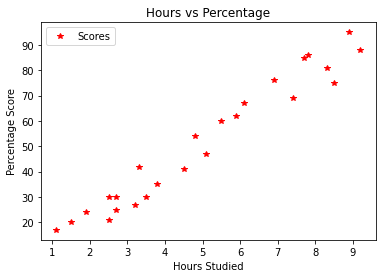

In [9]:
data.plot(x="Hours",y="Scores",style="*",color='red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

<AxesSubplot:>

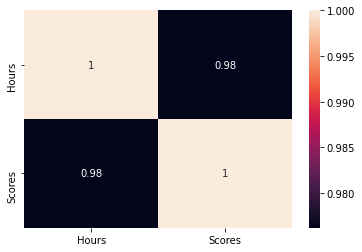

In [10]:
#Plotting correlation between feature and target
sns.heatmap(data.corr(),annot=True,linecolor='blue')

From this one can clearly see that there is strong positive correlation

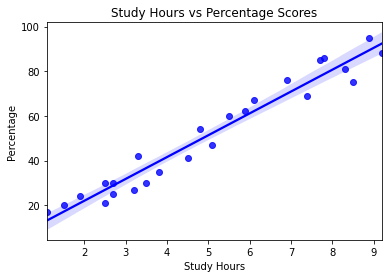

In [11]:
#Plotting regression plot to confirm above relationship between feature and target.
sns.regplot(x=data['Hours'],y=data['Scores'],data=data,color='blue')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

There is strong positive linear relation between the number of hours studied and percentage of score.

## Data Preparation

### Dividing Data

Dividing data as input and output.

In [12]:
x = data.iloc[:, :-1].values #Attribute
y = data.iloc[:, 1].values  #Labels
print("Hours Studied = ",x[0:5])
print("Scores Obtained = ",y[0:5])

Hours Studied =  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
Scores Obtained =  [21 47 27 75 30]


### Train-Test split

We dont have extra data for testing. So, we have to split the given data for training as well as testing. One can done this using "train_test_split()" inbuilt function of Scikit-Learn library. We gave the est size 24%.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.24,random_state =42 )

## Training

In [14]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In liear regression model the equation of the line is "Y = aX + c" where a is coefficient and c is intersept. After training our model we got most accurate values of coefficient and intersept.

In [15]:
print("Coefficient -", regressor.coef_)
print("Intercept - ", regressor.intercept_)

Coefficient - [9.60328059]
Intercept -  3.4359696365345442


These Coefficient and Intersept values are used to predict the result.

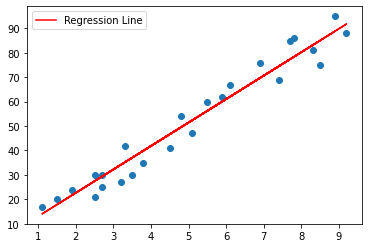

In [16]:
# Plotting the regression line
line = regressor.coef_*x + regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red', label='Regression Line')
plt.legend()
plt.show()

From above graph one can clearly see that the regression line goes nearly from all points. Which means our model is trained accurately.

## Prediction

In [17]:
print(x_test) # Data for test
y_pred = regressor.predict(x_test) #Predicted data

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]]


In [18]:
#Comparing the original and predicted values
df=pd.DataFrame({'Original':y_test,'Predicted':y_pred})
df

,Original,Predicted
0,81,83.143199
1,30,27.444171
2,21,27.444171
3,76,69.698606
4,62,60.095325
5,25,29.364827


In [19]:
#Training and Testing Scores
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9475373814076595
Test Score: 0.9684201924053587


From this one can cleary see that we got very good accuracy.

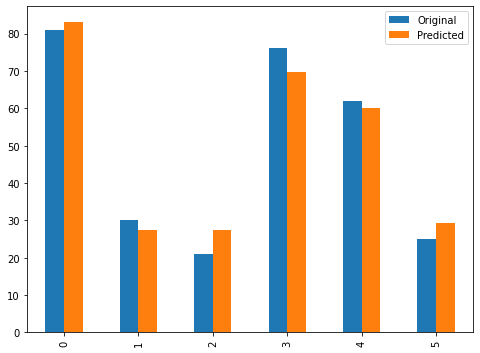

In [20]:
#plot of original and predicted values
df.plot(kind='bar',figsize=(8,6))
plt.show()

## Testing

Just give the value of Study hours to know the score.

In [21]:
# Testing with some new data
hours = float(input("Enter the Study Hours : "))
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Study Hours : 9.4
No of Hours = 9.4
Predicted Score = 93.70680717969444


## Evaluating The Model

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9523491564239777
Mean Squared Error: 19.173329294335417
Root Mean Squared Error: 4.37873603844025
R^2: 0.9684201924053587


From this one can clearly see that our R-2 score is 0.9684 which is very good.

It can also be say that model accuracy is 96.84%.

This means the algoritm of our model is good.

## Thank You!